# Aprendizaje Automático - Práctica 0 - Introducción a Python, Matplotlib y NumPy

#### Bonus: 5 puntos (1 por ejercicio)

#### Fecha límite de entrega: 12 de Marzo a las 23:59

#### Entrega a través de https://pradogrado2223.ugr.es/

### Nombre completo: <mark>JAVIER MORENO MORÓN</mark>



---







Este trabajo, cuya puntuación máxima será de 5 puntos (1 punto por cada uno de los cinco ejercicios), pretende servir como práctica y refuerzo de los conocimientos adquiridos en las primeras
sesiones prácticas, en donde se han introducido los principios de Python, Matplotlib y NumPy.

Límite de entrega: **12 de Marzo de 2023 a las 23:59 (PRADO)**

**Materiales a entregar**: única y exclusivamente este Notebook de Colab (fichero .ipynb). No es necesario entregar ninguna memoria externa, pero el código debe estar bien comentado, y todas las decisiones tomadas y el trabajo desarrollado deben documentarse suficientemente en celdas de texto. 

**Nota relativa a la entrega**: la entrega en PRADO está configurada para permitir sucesivas entregas de la práctica. Desde este punto de vista, se recomienda subir versiones de la práctica a medida que se van realizando los distintos ejercicios propuestos, y no dejarlo todo para el final, dado que es altamente improbable que se extienda la fecha de entrega.  

**Nota relativa a la realización de los ejercicios**: se parte de la premisa de que estos ejercicios no son particularmente difíciles, y pretenden evaluar el dominio que posee el/la alumno/a a la hora de manejar Python, en general, y matplotlib y NumPy en particular. En este sentido, el objetivo no es proporcionar *más o menos* las mismas salidas que se muestran en las celdas de texto de este cuaderno, sino exactamente las mismas (mismos colores, mismos marcadores, mismas etiquetas, mismos estilos, etc.). Es decir, se recomienda ser lo más fiel posible a la salida esperada para cada ejercicio. 



---






In [ ]:
# Importamos paquetes necesarios.
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt


## Ejercicio 1: lectura y visualización de datos (Iris Flower)



*   Leer la base de datos de Iris que hay en scikit-learn. Véase https://scikit-learn.org/stable/datasets/toy_dataset.html. El  conjunto de datos de flor Iris (https://en.wikipedia.org/wiki/Iris_flower_data_set), introducido por Ronald Fisher en 1936, es clásico en aprendizaje automático. 
*   Obtener las características (datos de entrada $X$) y la clase ($y$).
*   Quedarse con las características segunda y cuarta. Recuérdese que en Python los índices comienzan en $0$. 
*   Visualizar con un Scatter Plot los datos, coloreando cada clase con un color diferente e indicando con una leyenda la clase a la que corresponde cada color. Más concretamente, el resultado debe ser exactamente el que se muestra en la celda de resultados que se incluye más abajo. Esta es la única salida que proporciona este ejercicio. No se debe mostrar ninguna otra información en la celda de resultados.





Para leer la base de datos la importamos siguiendo las indicaciones de scikit-learn.

In [ ]:


# Leemos el dataset
from sklearn.datasets import load_iris
#print(load_iris())
np_data = np.array(load_iris().data)
np_class = np.array(load_iris().target)
#print(np_data)
#print(np_class)


A la hora de seleccionar las características me daba un error: **TypeError: unhashable type: 'slice'.**
 
Tras investigar he descubierto que era porque data no pertenecía a numpy, por lo que lo convierto creando np_data 

Para poder separar los datos según su clase guardo también el array target que recoge estos valores.

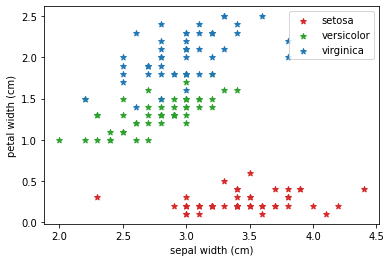

In [ ]:
# Caracteristicas a mantener
sepal_width = np_data[:, 1]
petal_width = np_data[:, 3] 

#Guardo los datos necesarios en una única matriz
all_data = np.array(list(zip(sepal_width, petal_width, np_class)))

# Separamos los datos según su clase

# Creamos un array para cada clase 
setosa = all_data[all_data[:, -1] == 0]
versicolor = all_data[all_data[:, -1] == 1]
virginica = all_data[all_data[:, -1] == 2]

# Visualizamos los datos con un Scatter plot
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_with_legend.html
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html

# Separamos datos en coordenadas x e y
setosa_x = setosa[:, 0]
setosa_y = setosa[:, 1]
versicolor_x = versicolor[:, 0]
versicolor_y = versicolor[:, 1]
virginica_x = virginica[:, 0]
virginica_y = virginica[:, 1]

fig, ax = plt.subplots()

# Dibujamos los datos
ax.scatter(setosa_x, setosa_y, color='tab:red', marker = '*', alpha = 1)
ax.scatter(versicolor_x, versicolor_y, color='tab:green', marker = '*', alpha = 1)
ax.scatter(virginica_x, virginica_y, color='tab:blue', marker = '*', alpha = 1)

# Añadimos los títulos de las coordenadas
ax.set_xlabel('sepal width (cm)')
ax.set_ylabel('petal width (cm)')

# Añadimos la leyenda
ax.legend(('setosa', 'versicolor', 'virginica'), loc='upper right')

plt.show()

Los colores me salen en un tono más claro pero he supuesto que simplemente es casualidad que en mi ordenador se vea así y no es un aspecto a modificar.

Actualización, uso alpha que hace los puntos más opacos, pero sigue sin ser el mismo tono de color.

## Ejercicio 2: lectura y visualización de datos (Breast Cancer)

*   Leer la también clásica base de datos de Breast Cancer (introducida en los años 90) que hay en scikit-learn. Véase https://scikit-learn.org/stable/datasets/toy_dataset.html y https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer. 
*   Obtener las características (datos de entrada $X$) y la clase ($y$).
*   Quedarse con las características denominadas 'mean area' y 'mean texture'. Para identificarlas el alumno debe explorar el conjunto de datos y ver qué índices corresponden a dichas características.  
*   Visualizar con un Scatter Plot los datos, coloreando cada clase con un color diferente e indicando con una leyenda la clase a la que corresponde cada color. El resultado debe ser el que se muestra en la celda de resultados que se incluye más abajo. 


In [ ]:
# Leemos el dataset
from sklearn.datasets import load_breast_cancer

np_data = np.array(load_breast_cancer().data)
np_names = np.array(load_breast_cancer().feature_names)
np_class = np.array(load_breast_cancer().target)

# Caracteristicas a mantener
col_mean_area = np.where(np_names=='mean area')
mean_area = np_data[:, col_mean_area[0][0]]

col_mean_texture = np.where(np_names=='mean texture')
mean_texture = np_data[:, col_mean_texture[0][0]] 

#Guardo los datos necesarios en una única matriz
all_data = np.array(list(zip(mean_area, mean_texture, np_class)))


A la hora de seleccionar las características a mantener uso el array que guarda a que corresponde cada columna le pido que me diga el índice de las columnas mean area y texture y del array de datos selecciono esas columnas

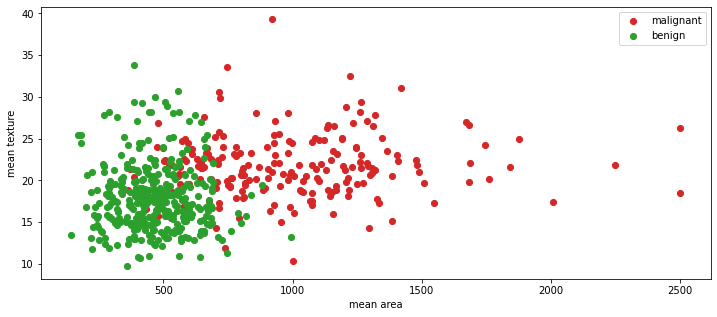

In [ ]:
# Separamos los datos según su clase
maligno = all_data[all_data[:, -1] == 0]
benigno = all_data[all_data[:, -1] == 1]

# Visualizamos los datos con un Scatter plot
maligno_x = maligno[:, 0]
maligno_y = maligno[:, 1]
benigno_x = benigno[:, 0]
benigno_y = benigno[:, 1]

fig, ax = plt.subplots()

# Dibujamos los datos
ax.scatter(maligno_x, maligno_y, color='tab:red', marker = '.', s = 150)
ax.scatter(benigno_x, benigno_y, color='tab:green', marker = '.', s = 150)

# Añadimos los títulos de las coordenadas
ax.set_xlabel('mean area')
ax.set_ylabel('mean texture')

# Añadimos la leyenda
ax.legend(('malignant', 'benign'), loc='upper right')

#Aumentamos la imagen del gráfico
fig.set_size_inches(12, 5)

plt.show()

* Se debe mostrar también, tal y como se muestra en la celda de resultados, un histograma con la frecuencia de ejemplos de cada clase. También se debe imprimir el número de ejemplos por clase, formateado de la forma que se indica más abajo. 


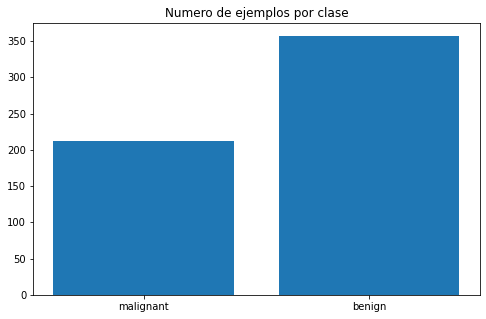

La clase "malignant" tiene 212 ejemplos
La clase "benign" tiene 357 ejemplos


In [ ]:
fig, ax = plt.subplots()

#Guardamos los tipos
cancers = np.array(load_breast_cancer().target_names)

#Guardamos las frecuencias de los tipos
frec_maligno = np.count_nonzero(np_class == 0)
frec_benigno = np.count_nonzero(np_class == 1)

frecuencias = [frec_maligno, frec_benigno]

#Dibujamos el histograma
ax.bar(cancers, frecuencias)

#Añadimos título
ax.set_title('Numero de ejemplos por clase')

#Aumentamos la imagen del gráfico
fig.set_size_inches(8, 5)

plt.show()
print('La clase "malignant" tiene ' + str(frec_maligno) + ' ejemplos')
print('La clase "benign" tiene ' + str(frec_benigno) + ' ejemplos')

Para contar el número de veces que un cáncer es benigno (1) o maligno (0) usamos count_nonzero y contamos las veces que se repite true, es decir las veces que está en el array np_class 0 y 1 respectivamente. 


* Se debe visualizar también, de la forma en que se muestra más abajo, el diagnóstico resultante en función del 'mean radius'. Junto con ello, se deben imprimir los valores máximo y mínimo para cada una de las dos clases

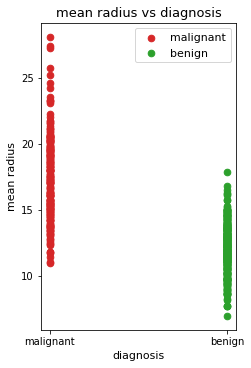

La clase "malignant" para la variable "mean radius" presenta unos valores entre 10.95 y 28.11
La clase "benign" para la variable "mean radius" presenta unos valores entre 6.981 y 17.85


In [ ]:
# Caracteristicas a mantener
col_mean_radius = np.where(np_names=='mean radius')
mean_radius = np_data[:, col_mean_radius[0][0]]

#Guardo los datos necesarios en una única matriz
all_data = np.array(list(zip(mean_radius, np_class)))

# Separamos los datos según su clase
maligno = all_data[all_data[:, -1] == 0]
benigno = all_data[all_data[:, -1] == 1]

# Visualizamos los datos con un Scatter plot
maligno_y = maligno[:, 0]
maligno_x = np.full(maligno_y.shape, "malignant")
benigno_y = benigno[:, 0]
benigno_x = np.full(benigno_y.shape, "benign")

fig, ax = plt.subplots()

# Dibujamos los datos
ax.scatter(maligno_x, maligno_y, color='tab:red', marker = '.', s = 175)
ax.scatter(benigno_x, benigno_y, color='tab:green', marker = '.', s = 175)

# Añadimos los títulos de las coordenadas
ax.set_xlabel('diagnosis', fontdict = {'fontsize':11})
ax.set_ylabel('mean radius', fontdict = {'fontsize':11})

# Añadimos la leyenda
ax.legend(('malignant', 'benign'), loc='upper right', fontsize=11)

#Añadimos título
ax.set_title('mean radius vs diagnosis', fontdict = {'fontsize':13})

#Aumentamos la imagen del gráfico
fig.set_size_inches(3.5, 5.65)

plt.show()
print('La clase "malignant" para la variable "mean radius" presenta unos valores entre ' 
      + str(np.min(maligno_y)) + ' y ' + str(np.max(maligno_y)))
print('La clase "benign" para la variable "mean radius" presenta unos valores entre ' 
      + str(np.min(benigno_y)) + ' y ' + str(np.max(benigno_y)))

Las etiquetas de los ejes no terminan de tener el mismo tamaño que en el modelo, pero no he conseguido encontrar ningún argumento que modifique sus tamaños.

## Ejercicio 3: separación balanceada de conjuntos de entrenamiento y test

*   Partir de los datos de Iris (empleados en el Ejercicio 1), y separar en training (80\% de los datos) y test (20\%) aleatoriamente, conservando la proporción de elementos en cada clase tanto en training como en test. Con esto se pretende evitar que haya clases infra-representadas en entrenamiento o test. Con "aleatoriamente" nos referimos a que no sería válido escoger como conjunto de entrenamiento el 80\% inicial de ejemplos de cada clase y como conjunto de test el 20\% final. Es decir, al principio, los ejemplos pertenecientes a cada clase deben desordenarse con respecto al orden original. En la implementación de este ejercicio no se pueden emplear funciones como $train\_test\_split$ de scikit-learn o similares.
*   Se debe imprimir el número resultante de ejemplos de cada clase, tanto en entrenamiento como en test, así como las clases de cada uno de los ejemplos de entrenamiento y test. En la celda de resultados que se incluye a continuación se muestra el tipo de salida que se espera obtener.





In [ ]:

np.random.seed(0)

np_data = np.array(load_iris().data)
np_class = np.array(load_iris().target)

sepal_width = np_data[:, 1]
petal_width = np_data[:, 3] 

all_data = np.array(list(zip(sepal_width, petal_width, np_class)))

#Desordenamos el array
np.random.shuffle(all_data)

#Repartimos el array en dos
cont_setosas = 0
cont_versicolor = 0
cont_virginica = 0
cont_training = 0
max_training = int(len(np_class) * 0.8)
max_clase = int(len(np_class) * 0.8 / 3)

training = np.empty(0)
test = np.empty(0)

for i in all_data:
  if cont_training < max_training:
    if i[2]==0 and cont_setosas < max_clase: #Setosa
      training = np.append(training, i[2])
      cont_training+=1
      cont_setosas+=1
    elif i[2]==1 and cont_versicolor < max_clase: #Versicolor
      training = np.append(training, i[2])
      cont_training+=1
      cont_versicolor+=1
    elif i[2]==2 and cont_virginica < max_clase: #Virginica
      training = np.append(training, i[2])
      cont_training+=1
      cont_virginica+=1
    else:
      test = np.append(test, i[2])
  else:
    test = np.append(test, i[2])

num_set_train = np.count_nonzero(training == 0) #Contamos cuantas setosas hay en training
num_set_test  = np.count_nonzero(test     == 0) #Contamos cuantas setosas hay en test
num_ver_train = np.count_nonzero(training == 1) #Contamos cuantas versicolor hay en training
num_ver_test  = np.count_nonzero(test     == 1) #Contamos cuantas versicolor hay en test
num_vir_train = np.count_nonzero(training == 2) #Contamos cuantas virginicas hay en training
num_vir_test  = np.count_nonzero(test     == 2) #Contamos cuantas virginicas hay en test

print('--- Clase setosa ---')
print('Ejemplos train:  ' + str(num_set_train))
print('Ejemplos test:  ' + str(num_set_test))
print('--- Clase versicolor ---')
print('Ejemplos train:  ' + str(num_ver_train))
print('Ejemplos test:  ' + str(num_ver_test))
print('--- Clase virginica ---')
print('Ejemplos train:  ' + str(num_vir_train))
print('Ejemplos test:  ' + str(num_vir_test))
print('Clase de los ejemplos de entrenamiento:')
print(training)
print('Clase de los ejemplos de test:')
print(test)

--- Clase setosa ---
Ejemplos train:  40
Ejemplos test:  10
--- Clase versicolor ---
Ejemplos train:  40
Ejemplos test:  10
--- Clase virginica ---
Ejemplos train:  40
Ejemplos test:  10
Clase de los ejemplos de entrenamiento:
[2. 1. 0. 2. 0. 2. 0. 1. 1. 1. 2. 1. 1. 1. 1. 0. 1. 1. 0. 0. 2. 1. 0. 0.
 2. 0. 0. 1. 1. 0. 2. 1. 0. 2. 2. 1. 0. 1. 1. 1. 2. 0. 2. 0. 0. 1. 2. 2.
 2. 2. 1. 2. 1. 1. 2. 2. 2. 2. 1. 2. 1. 0. 2. 1. 1. 1. 1. 2. 0. 0. 2. 1.
 0. 0. 1. 0. 2. 1. 0. 1. 2. 1. 0. 2. 2. 2. 2. 0. 0. 2. 2. 0. 2. 0. 2. 2.
 0. 0. 2. 0. 0. 0. 1. 2. 2. 0. 0. 0. 1. 1. 0. 0. 1. 0. 2. 1. 2. 1. 0. 1.]
Clase de los ejemplos de test:
[2. 0. 2. 0. 0. 2. 0. 2. 1. 1. 2. 2. 1. 1. 0. 1. 2. 2. 0. 1. 1. 1. 1. 0.
 0. 0. 2. 1. 2. 0.]


Los arrays training y test no están en el mismo orden que en el modelo pero he supuesto que es porque usamos funciones diferentes para desordenar los datos iniciales.

## Ejercicio 4: visualización de funciones 2D



*   Obtener 150 valores equiespaciados entre 0 y 4$\pi$
*   Obtener el valor de las siguientes funciones  para los 150 valores anteriormente calculados.

$f_1(x)= 10^{-5}\cdot\sinh(x) + 0.5\cdot\arctan(x)$

$f_2(x)= \cos(x) - 2\cdot\sin(x)$

$f_3(x)= \tanh(5\cdot\sin(x) + 3\cdot\cos(x))$

*   Visualizar las tres curvas simultáneamente en el mismo plot (con líneas discontinuas en rojo, azul y verde) e incluir la leyenda correspondiente. Más concretamente, el resultado debe ser el que se muestra en la siguiente celda de resultados. Esta es la única salida que proporciona este ejercicio. No se debe mostrar ninguna otra información.



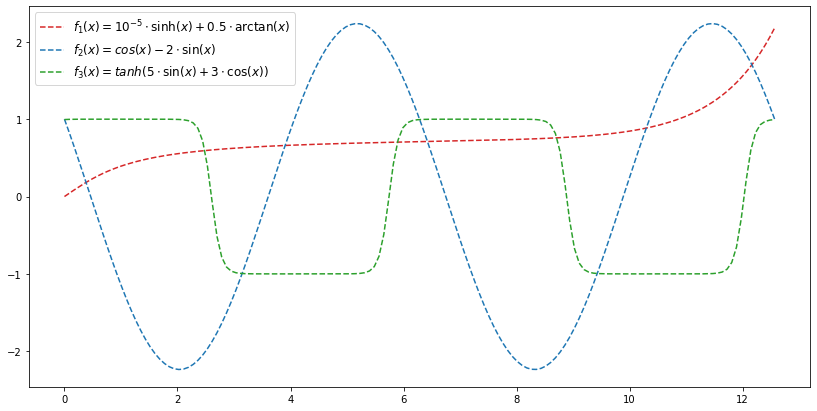

In [ ]:
# Obtener 150 valores equiespaciados entre 0 y 4$\pi$
all_data = np.array(np.linspace(0, 4*np.pi, 150))

# Obtener el valor de las funciones indicadas para los 150 valores anteriormente calculados.
f1_y = np.array([10**(-5) * np.sinh(i) + 0.5 * np.arctan(i) for i in all_data])
f2_y = np.array([np.cos(i) - 2 * np.sin(i) for i in all_data])
f3_y = np.array([np.tanh(5 * np.sin(i) + 3 * np.cos(i)) for i in all_data])

#Visualizar las tres curvas simultáneamente en el mismo plot (con líneas discontinuas en rojo, azul y verde). 
fig, ax = plt.subplots()

#Dibujamos las funciones
ax.plot(all_data, f1_y, color = 'tab:red', linestyle = 'dashed')
ax.plot(all_data, f2_y, color = 'tab:blue', linestyle = 'dashed')
ax.plot(all_data, f3_y, color = 'tab:green', linestyle = 'dashed')

# Añadimos la leyenda
from IPython.display import display, Latex, Math #Para expresar las funciones en la leyenda

a = r'$f_{1}(x) = 10^{-5}\cdot\sinh(x)+0.5\cdot\arctan(x)$'
b = r'$f_{2}(x) = cos(x)-2\cdot\sin(x)$'
c = r'$f_{3}(x) = tanh(5\cdot\sin(x)+3\cdot\cos(x))$'

ax.legend((a, b, c), loc='upper left', fontsize=12)

#Aumentamos la imagen del gráfico
fig.set_size_inches(14, 7)

plt.show()

Para escribir las funciones matemáticas simplemente he cogido el ejemplo de la guía de python y lo he ido modelando hasta conseguir las funciones del ejercicio.

## Ejercicio 5: visualización de funciones 3D



*   Mostrar dos funciones 3D dentro de la misma figura. Las funciones a mostrar son las siguientes:

$f_1(x,y) =  10 - 2\cdot|x+y| + 2\cdot|y-x|$

$f_2(x,y) =  10 \cdot sin(\sqrt{x^2+y^2})$

*   Como se indicaba, ambas funciones deben mostrarse dentro de la misma figura/ventana como *surface plots*. Más concretamente, el resultado debe ser exactamente el que se muestra en la siguiente celda de resultados (tanto a nivel de título de las gráficas, como de rango de valores en los ejes y colores empleados). Esta es la única salida que proporciona este ejercicio. No se debe mostrar ninguna otra información. El siguiente enlace puede servir de ayuda y referencia a la hora de realizar este ejercicio: https://matplotlib.org/stable/gallery/mplot3d/subplot3d.html. De cara a mostrar ecuaciones matemáticas en figuras de Matplotlib usando LaTeX la siguiente referencia puede ser de utilidad: https://matplotlib.org/stable/gallery/text_labels_and_annotations/tex_demo.html.

La función *meshgrid* puede ser de gran utilidad en este ejercicio. Véanse https://interactivechaos.com/es/manual/tutorial-de-numpy/la-funcion-meshgrid
y https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html



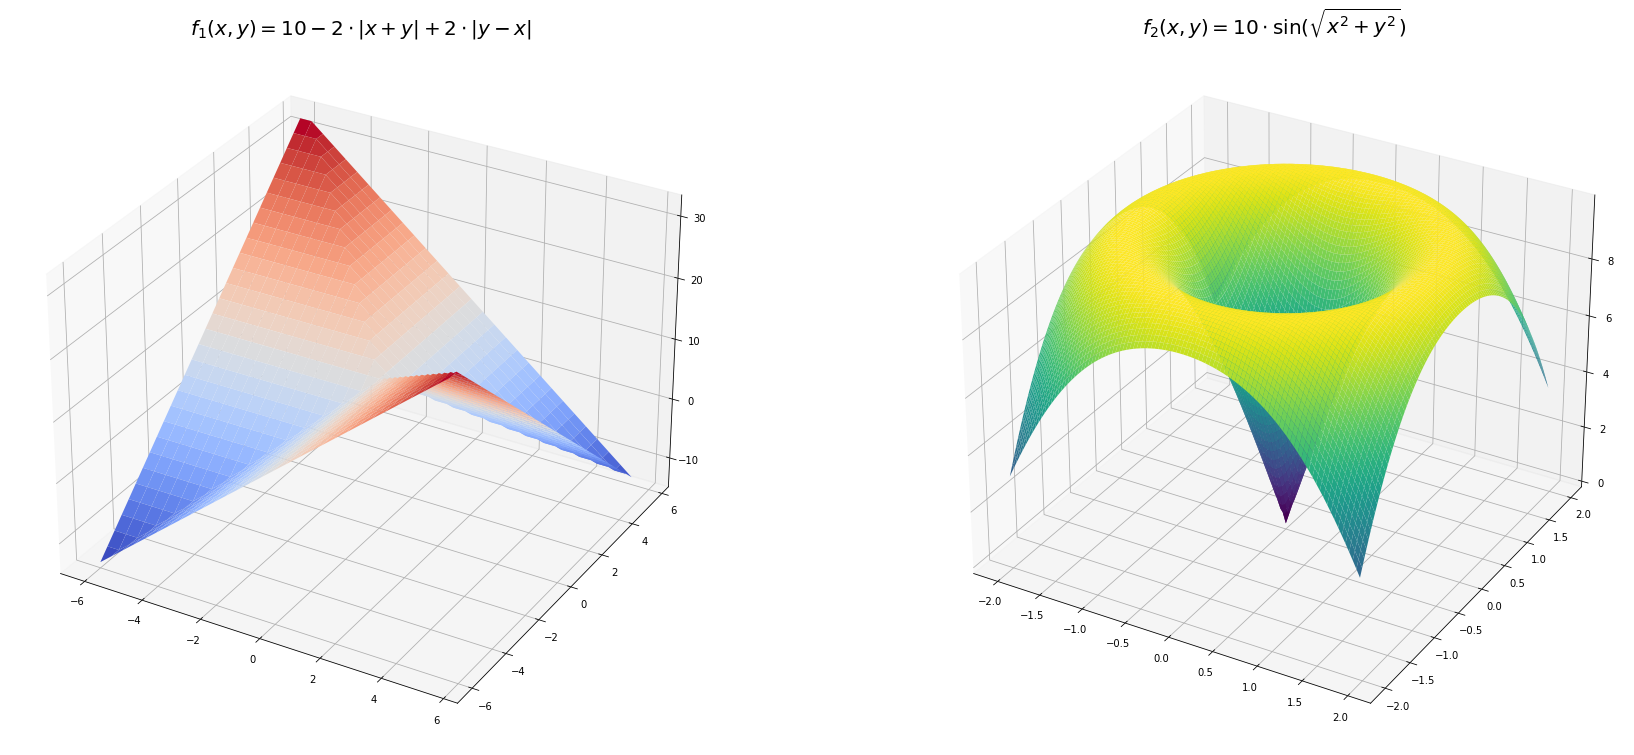

In [ ]:
from matplotlib import cm #Para los tonos cálidos de la gráfica 1

def f1(x, y):
    return (10 - 2 * abs(x+y) + 2 * abs(y-x))

def f2(x,y):
    return (10 * np.sin(np.sqrt(x**2 + y**2)))

fig = plt.figure(figsize=(30, 13))

#Gráfica 1
ax = fig.add_subplot(1, 2, 1, projection='3d')

#Damos valores a X, Y y Z
X = np.arange(-6, 6, 0.4)
Y = np.arange(-6, 6, 0.4)
X, Y = np.meshgrid(X, Y)   #Devuelve coord. matriciales de unas coord. vectoriales
Z = f1(X, Y)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, 
                antialiased=True)

a = r'$f_{1}(x,y) = 10-2\cdot\|x+y|+2\cdot\|y-x|$'
ax.set_title(a, fontdict = {'fontsize':20})

#Gráfica 2
ax = fig.add_subplot(1, 2, 2, projection='3d')

X = np.arange(-2.0, 2.0, 0.04)
Y = np.arange(-2.0, 2.0, 0.04)
X, Y = np.meshgrid(X, Y)
Z = f2(X, Y)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.viridis, linewidth=0, 
                antialiased=True)

b = r'$f_{2}(x,y) = 10\cdot\sin(\sqrt{x^2+y^2})$'
ax.set_title(b, fontdict = {'fontsize':20})

plt.show()
#print(dir(cm)) #Para ver los colores posibles para las gráficas
#Justo era el último color y he tenido que probar todos jajajajaja

#NOTA: puede que Colab proporcione el siguiente error al intentar poner el título de la figura en LaTeX:
#[Errno 2] No such file or directory: 'latex': 'latex'.
#Una posible solución sería la indicada en el siguiente enlace: 
#https://stackoverflow.com/questions/55746749/latex-equations-do-not-render-in-google-colaboratory-when-using-matplotlib
#Y, más concretamente, serviría con hacer
#!apt install texlive-fonts-recommended texlive-fonts-extra cm-super dvipng


Antes de usar la función meshgrid() me daba un error diciendome que Z debía ser 2-Dimensiones, por lo que siguiendo los pasos del enlace proporcionado más arriba observo que usan dicha función y yo no, compruebo lo que hace y llego a la conclusión de que ahí puede estar el problema.

Las gráficas modelo parecen ser más transparentes, he estado investigando y no he encontrado ninguna variable para hacerlas más transparentes. Actualización, poniendo la variable antialiased a True consigues la sensación de transparencia.

De cara a visualizar gráficos interactivos en Colab (es decir, que os permitan ampliar, mover o desplazaros por un gráfico) os recomiendo el uso de librerías como Altair, Plotly o Bokeh. Esta recomendación viene motivada por el hecho de que Matplotlib, del mismo modo que permite interactuar con las figuras en Spyder sin ningún problema, en Google Colab presenta un comportamiento diferente. 

En este sentido, en caso de que sea de vuestro interés, podéis explorar el siguiente cuaderno de Colab, en donde se muestran distintas técnicas y librerías de visualización: https://colab.research.google.com/notebooks/charts.ipynb